#### Work In Progress ...

In this notebook, we shall use Hopfield Networks to classify the MNIST digits dataset.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

In [133]:
# loading the data
file = np.loadtxt(r'C:\Users\ANUNAY CHANDRA\Desktop\ML-from-scratch\ML\CNN\archive\mnist_train.csv',delimiter=',',skiprows=1)
y = file[:,0]
X_flat = file[:,1:]

In [134]:
# function to convert flattened MNIST array to a matrix (gray-scale image)
def make_image(arr):
    arr = np.array(arr)
    img = []
    N = 28
    for i in range(N):
        img.append(arr[N*i:N*i+N])
    return np.array(img)

In [135]:
# using X_flat to get images (stored in X)
X = []
for x in X_flat:
    X.append(make_image(x))
X = np.array(X)/255

In [136]:
print(f'Shape of X_flat : {np.shape(X_flat)}')
print(f'Shape of X : {np.shape(X)}')

Shape of X_flat : (60000, 784)
Shape of X : (60000, 28, 28)


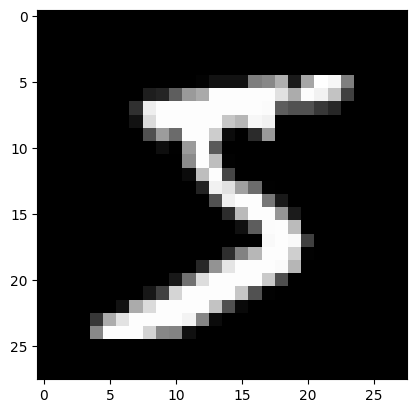

In [137]:
plt.imshow(X[0],cmap = 'gray')
plt.show()

In [138]:
print(np.unique(X[0]))

[0.         0.00392157 0.00784314 0.01176471 0.03529412 0.04313725
 0.05490196 0.0627451  0.07058824 0.09019608 0.09411765 0.09803922
 0.10196078 0.10588235 0.11764706 0.1372549  0.14117647 0.15294118
 0.16862745 0.17647059 0.18039216 0.19215686 0.21568627 0.21960784
 0.25098039 0.25882353 0.2745098  0.30588235 0.31372549 0.31764706
 0.32156863 0.35294118 0.36470588 0.36862745 0.41960784 0.42352941
 0.44705882 0.46666667 0.49411765 0.49803922 0.50980392 0.51764706
 0.52156863 0.52941176 0.53333333 0.54509804 0.58039216 0.58823529
 0.60392157 0.61176471 0.62745098 0.65098039 0.66666667 0.67058824
 0.6745098  0.68627451 0.71372549 0.71764706 0.72941176 0.73333333
 0.74509804 0.76470588 0.77647059 0.78823529 0.80392157 0.81176471
 0.83137255 0.83529412 0.85882353 0.86666667 0.88235294 0.88627451
 0.89803922 0.93333333 0.94117647 0.94509804 0.94901961 0.95686275
 0.96862745 0.97647059 0.98039216 0.98431373 0.98823529 0.99215686
 1.        ]


In [139]:
# train test split
train_ratio = 0.4
boundary = int(train_ratio*len(X))
X_train = X[:boundary]
y_train = y[:boundary]
X_test = X[boundary:]
y_test = y[boundary:]

### What are we going to do ?

As of now, the gray-scale pixels are stored as floating literals in interval [0,1].
We will first convert the images of training set into binary gray-scale valued arrays as below:

In [140]:
threshold = 0.50
X_train[X_train<=threshold] = 0.0
X_train[X_train>threshold] = 1.0

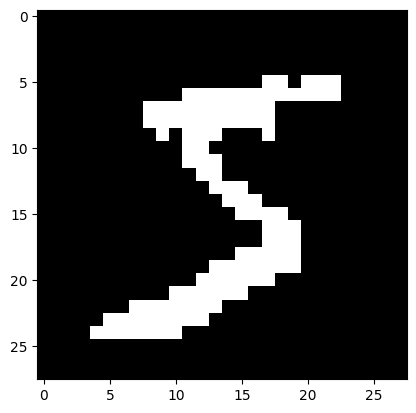

In [141]:
plt.imshow(X_train[0],cmap = 'gray')
plt.show()

We shall average over all the 10 digits separately in the training set.

In [142]:
X_digits_arr = []
for i in range(10):
    sum = np.zeros_like(X_train[0])
    counter = 0
    for j in range(len(X_train)):
        if y_train[j] == i:
            sum+=X_train[j]
            counter+=1
    X_digits_arr.append(sum/counter)
X_digits_arr = np.array(X_digits_arr)

After averaging over digits of each category we obtain the following images.

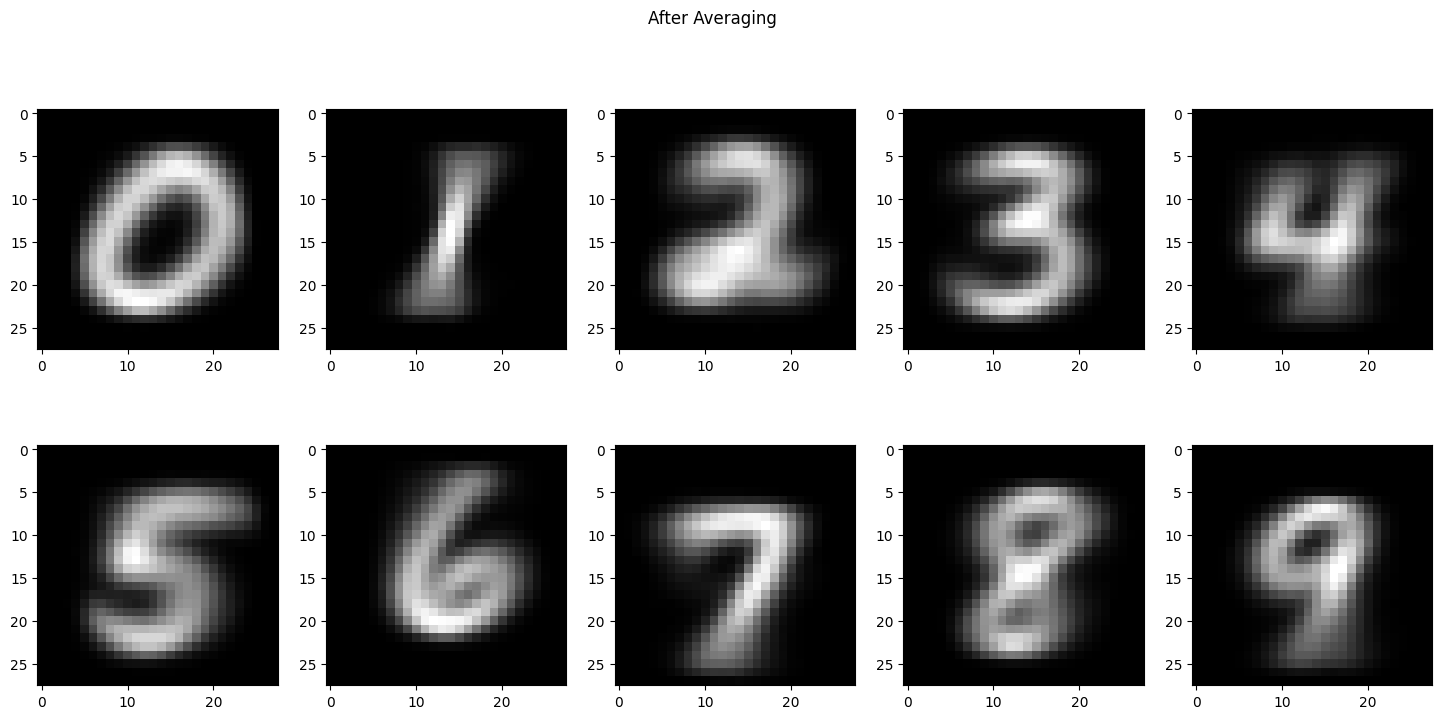

In [143]:
plt.figure(figsize = (18,8))
plt.subplot(2,5,1)
plt.imshow(X_digits_arr[0],cmap = 'gray')
plt.subplot(2,5,2)
plt.imshow(X_digits_arr[1],cmap = 'gray')
plt.subplot(2,5,3)
plt.imshow(X_digits_arr[2],cmap = 'gray')
plt.subplot(2,5,4)
plt.imshow(X_digits_arr[3],cmap = 'gray')
plt.subplot(2,5,5)
plt.imshow(X_digits_arr[4],cmap = 'gray')
plt.subplot(2,5,6)
plt.imshow(X_digits_arr[5],cmap = 'gray')
plt.subplot(2,5,7)
plt.imshow(X_digits_arr[6],cmap = 'gray')
plt.subplot(2,5,8)
plt.imshow(X_digits_arr[7],cmap = 'gray')
plt.subplot(2,5,9)
plt.imshow(X_digits_arr[8],cmap = 'gray')
plt.subplot(2,5,10)
plt.imshow(X_digits_arr[9],cmap = 'gray')
plt.suptitle('After Averaging')
plt.show()

Next, to make it suitable for a Hopfield Network, we use threshold to make it binary valued, {-1,1}.

In [144]:
X_digits_binary = X_digits_arr.copy()
threshold = 0.44
for i in range(10):
    X_digits_binary[X_digits_binary<=threshold] = -1.0
    X_digits_binary[X_digits_binary>threshold] = 1.0

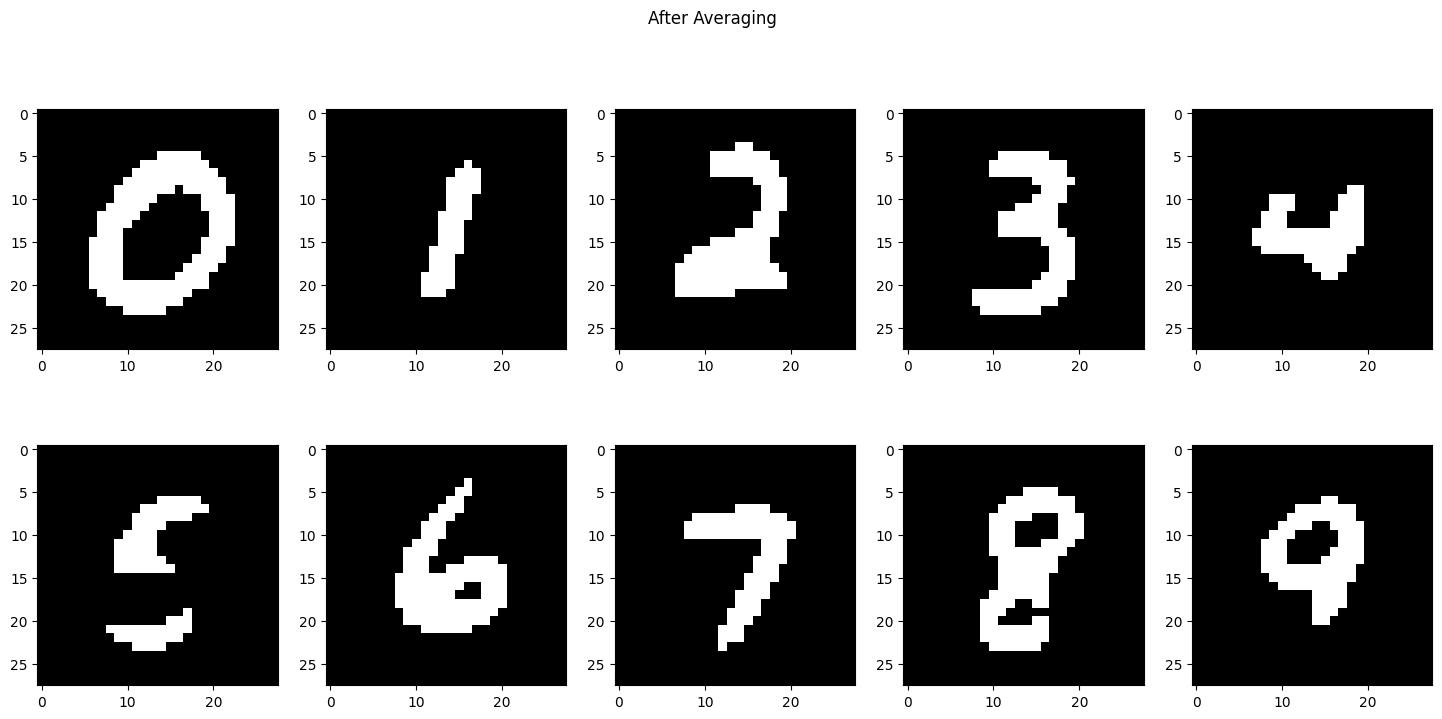

In [145]:
plt.figure(figsize = (18,8))
plt.subplot(2,5,1)
plt.imshow(X_digits_binary[0],cmap = 'gray')
plt.subplot(2,5,2)
plt.imshow(X_digits_binary[1],cmap = 'gray')
plt.subplot(2,5,3)
plt.imshow(X_digits_binary[2],cmap = 'gray')
plt.subplot(2,5,4)
plt.imshow(X_digits_binary[3],cmap = 'gray')
plt.subplot(2,5,5)
plt.imshow(X_digits_binary[4],cmap = 'gray')
plt.subplot(2,5,6)
plt.imshow(X_digits_binary[5],cmap = 'gray')
plt.subplot(2,5,7)
plt.imshow(X_digits_binary[6],cmap = 'gray')
plt.subplot(2,5,8)
plt.imshow(X_digits_binary[7],cmap = 'gray')
plt.subplot(2,5,9)
plt.imshow(X_digits_binary[8],cmap = 'gray')
plt.subplot(2,5,10)
plt.imshow(X_digits_binary[9],cmap = 'gray')
plt.suptitle('After Averaging')
plt.show()

Storing these digits in the memory of Hopfield Network.

In [146]:
# the function below returns the weights to learn the input vector
def weight(memory_vector):
    w = np.outer(memory_vector,memory_vector)
    for i in range(len(w)):
        w[i][i] = 0
    return w

In [167]:
# storing the weights of MNIST digits
# this step makes the network memorize the digits
w_arr = []
for i in range(2):
    digit = X_digits_binary[i].copy()
    memory_vector = digit.flatten()
    w_arr.append(weight(memory_vector))
w_arr = np.array(w_arr)
w_MNIST = np.mean(w_arr,axis=0)

In [161]:
# single updation
def update(vector,w):
    L = len(vector)
    index = r.randint(28,L-28)
    new_val = np.dot(w[index],vector)
    vector[index] = np.sign(new_val)
    return vector

In [168]:
# running the Hopfield network till it matched one of the digits in memory
def Hopfield(vector_ini,w,max_iter = 50000):
    vector = np.array(vector_ini).copy()
    for _ in range(max_iter):
        vector = update(vector,w)
        for digit in range(10):
            if np.array_equal(vector, X_digits_binary[digit].flatten()):
                return digit, vector
    return -1, vector

In [163]:
print(y_test[:20])

[8. 5. 8. 6. 5. 7. 9. 8. 7. 9. 2. 0. 2. 1. 2. 2. 6. 3. 4. 4.]


In [170]:
# testing the network on single sample
img_no = 13
print(y_test[img_no])
test_img = X_test[img_no]
test_img[test_img<=threshold] = -1.0
test_img[test_img>threshold] = 1.0
index,final_vector = Hopfield(test_img.flatten(),w_MNIST)
print(index)

1.0
1


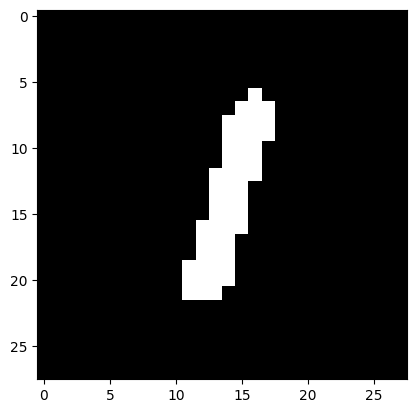

In [171]:
plt.imshow(X_digits_binary[int(y_test[img_no])],cmap = 'gray')
plt.show()

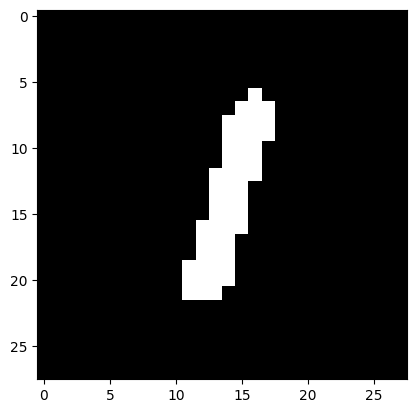

In [172]:
plt.imshow(np.reshape(final_vector,(28,28)),cmap = 'gray')
plt.show()